<h3>Medical Insurance Cost Analysis </h3>

In [1]:
# importing libraries
import numpy as np
import pandas as pd


In [2]:
# importing and reading data
data = pd.read_csv("archive/insurance.csv")
data = data.dropna()
print(data.info())
print(data.head(6))
print ("Successfully imported Insurance data. Data has {} data points with {} variables each.".format(*data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
Successfully imported Insur

<h4>Data Exploration</h4>
Dataset consists of 1338 records. Each record contains the below data for specific person.

- age – Age of the person
- sex – Sex of the person
- bmi – Body Mass Index(BMI) of the person
- children – Number of children for the person
- smoker – Smoking status of the person
- region – Region of the person in US
- charges – Medical Insurance costs per year for the person

In [3]:
def bmi_category(bmi):
    """
    Check BMI category
    """
    if bmi < 18.5:
        return "under-weight"
    elif bmi >= 18.5 and bmi <= 24.9:
        return "normal-weight"
    elif bmi >= 24 and bmi <= 29.9:
        return "over-weight"
    elif bmi > 30.0:
        return "obese"

def age_category(age):
    """
    Check Age category
    """
    age_dict = {
        0: "0-9",
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
        
    }
    return age_dict[age//10]
data["cbmi"] = data["bmi"].apply(lambda x: "none")
data["cage"] = data["age"].apply(lambda x: "none")

for idx, row in data.iterrows():
    data.at[idx, "cage"] = age_category(row["age"])
    data.at[idx, "cbmi"] = bmi_category(row["bmi"])
by_age = data.groupby(by="cage").size()
print("Grouped data by AGE")
print(by_age)



Grouped data by AGE
cage
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64


In [4]:
# sex
by_sex = data.groupby(by="sex").size()
print("Grouped data by SEX")
print(by_sex)


Grouped data by SEX
sex
female    662
male      676
dtype: int64


In [5]:
# smokers 
by_smoker = data.groupby(by="smoker").size()
print("Grouped by SMOKING")
print(by_smoker)


Grouped by SMOKING
smoker
no     1064
yes     274
dtype: int64


In [6]:
# by region
by_region = data.groupby(by="region").size()
print("Grouped by REGION")
print(by_region)


Grouped by REGION
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


In [7]:
# children
by_children = data.groupby(by="children").size()
print("Grouped by CHILDREN")
print(by_children)


Grouped by CHILDREN
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64


In [8]:
# bmi
by_bmi = data.groupby(by="cbmi").size()
print("Grouped by BMI")
print(by_bmi)

Grouped by BMI
cbmi
normal-weight    222
obese            705
over-weight      380
under-weight      20
dtype: int64


From the above data we can observe below

- Input data contains an even distribution of male and female samples
- Majority of them are non-smokers with 1064 samples
- Majority of the samples are in age groups 20-29 and 40- 49 with the numbers 280 and 279 respectively.
- A major sample of input data contains persons with no children with 574.
- The data is evenly distributed across 4 regions with the region of southeast having slightly more samples.
- Majority the sample fall under the category of obese


In [9]:
# visualizing the variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

******
Data distribution



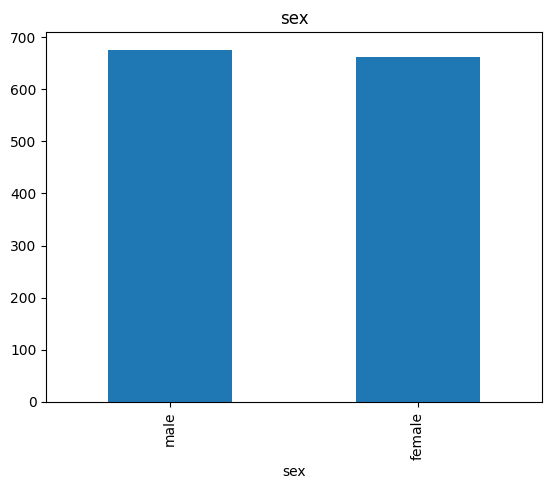

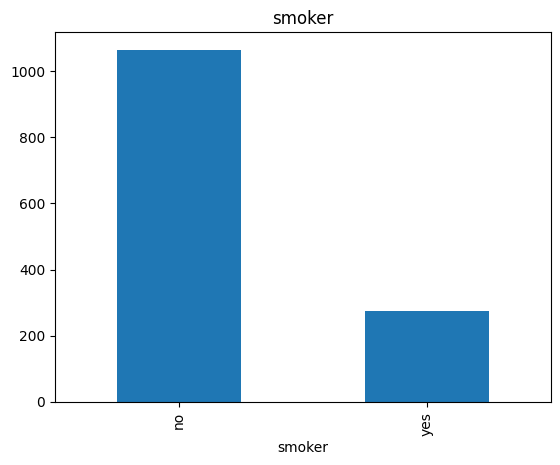

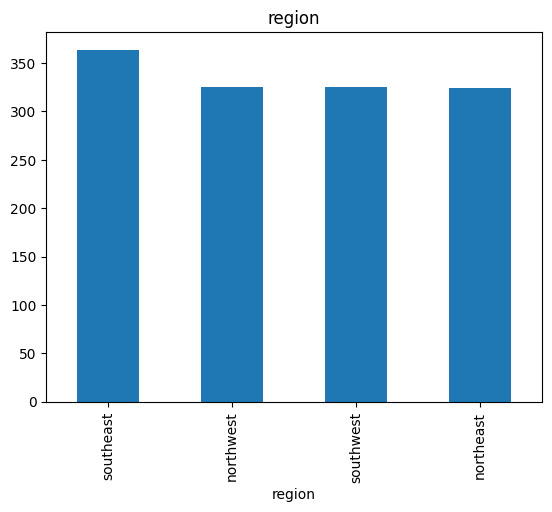

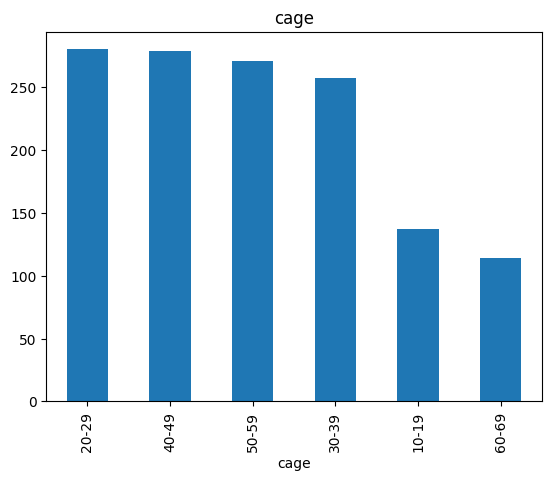

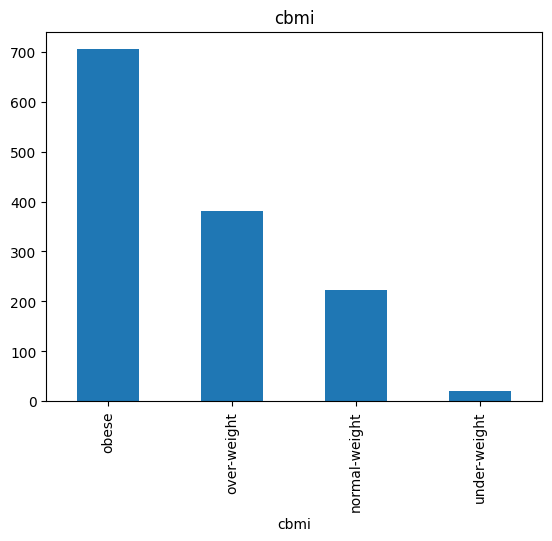

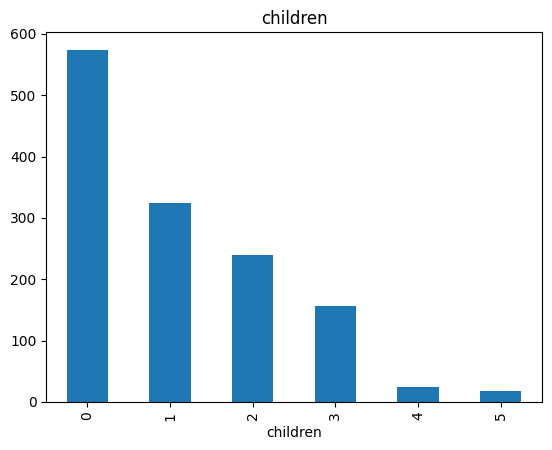

In [12]:
# visualizing data distribution
variables = ['sex','smoker','region','cage','cbmi','children']
print("******")
print("Data distribution\n")
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = "bar")
    plt.title(v)
    plt.show()
    

Mean cost analysis



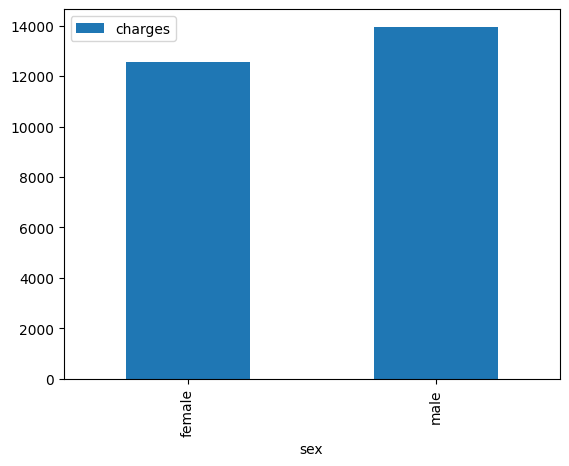

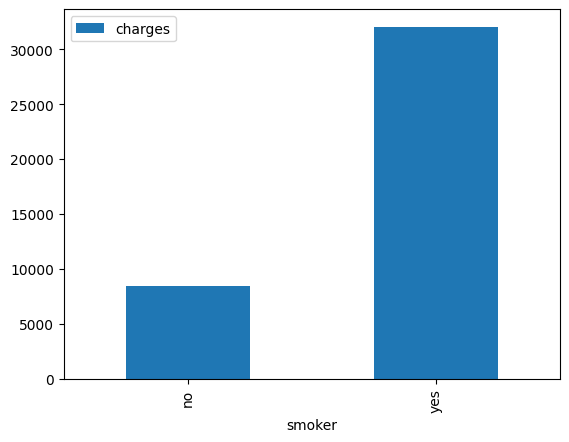

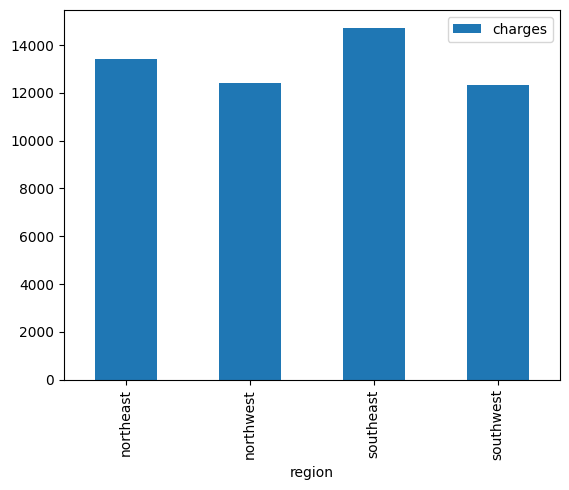

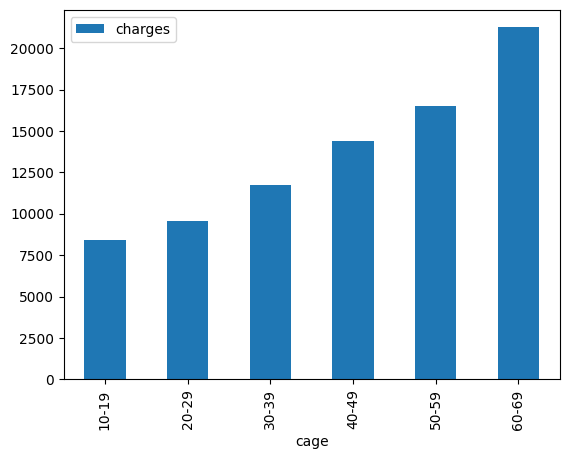

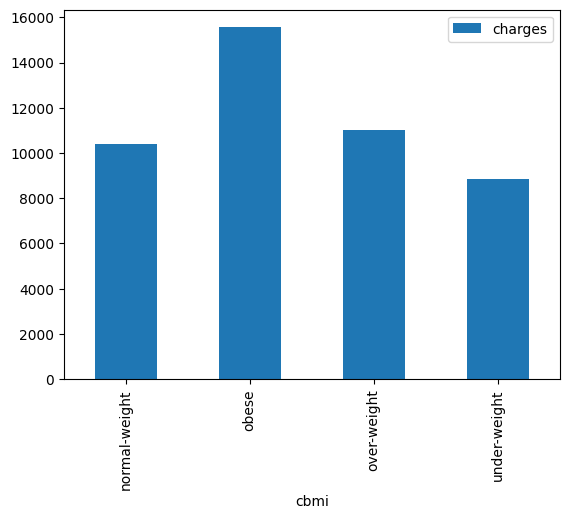

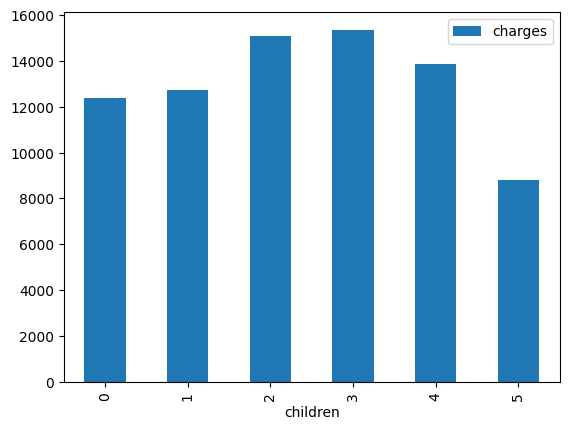

In [15]:
# visualizing mean cost
print("Mean cost analysis\n")
for v in variables:
    group_df = data.groupby(pd.Grouper(key=v)).mean(numeric_only=True)
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

From the above bar graphs, we can deduce the below facts.

- Insurance costs are higher among male population
- Insurance costs are highest among the population of age groups 60-69.
- Insurance costs increases among the smokers
- Insurance costs increases among the obese population
- Insurance costs are higher among the population in southwest region
- Surprisingly, insurance costs are higher among the individuals with 2 or 3 children rather than with individuals with 4 or 5 children.

<Axes: xlabel='sex', ylabel='charges'>

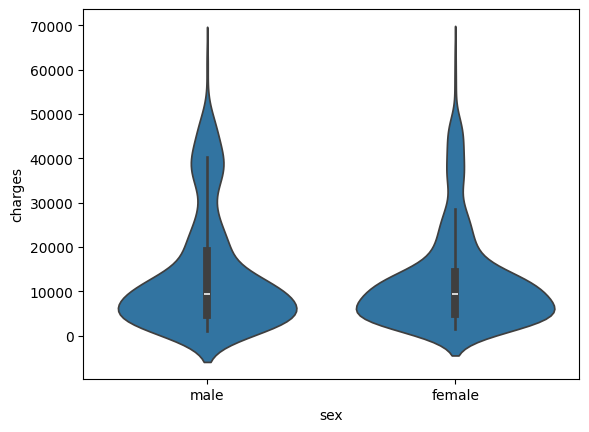

In [16]:
sns.violinplot(x="sex", y="charges", data=data)

<Axes: xlabel='smoker', ylabel='charges'>

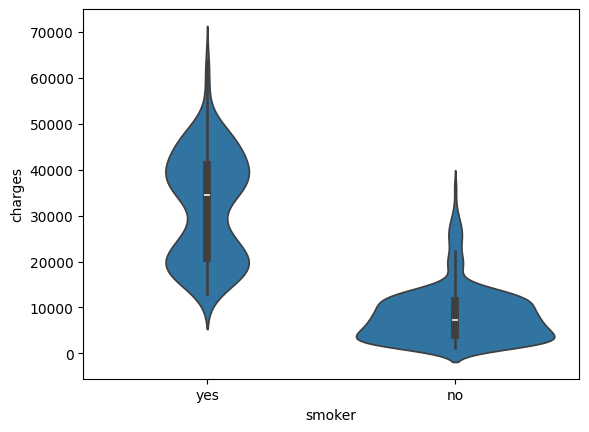

In [17]:
sns.violinplot(x="smoker", y="charges", data=data)

<Axes: xlabel='region', ylabel='charges'>

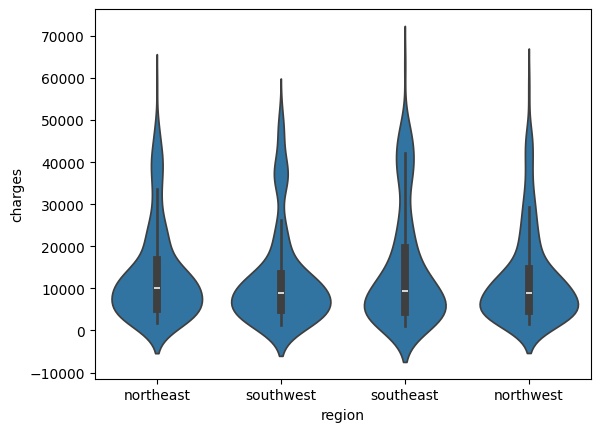

In [18]:
sns.violinplot(x="region", y="charges", data=data)

<Axes: xlabel='sex', ylabel='charges'>

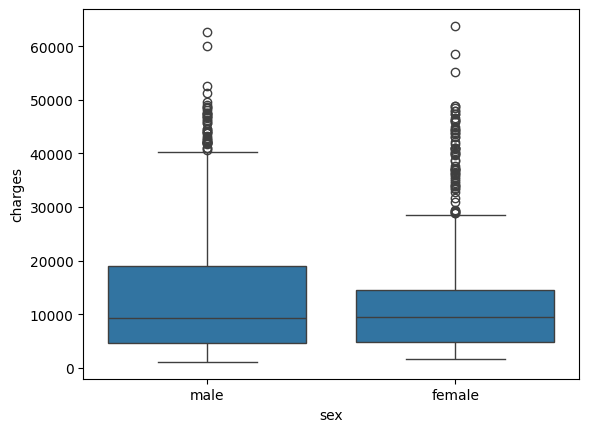

In [19]:
sns.boxplot(x="sex", y="charges", data=data)

<Axes: xlabel='cage', ylabel='charges'>

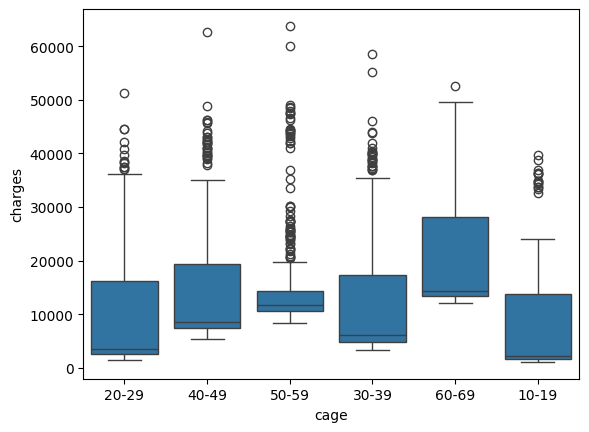

In [20]:
sns.boxplot(x="cage", y="charges", data=data)

<Axes: xlabel='cbmi', ylabel='charges'>

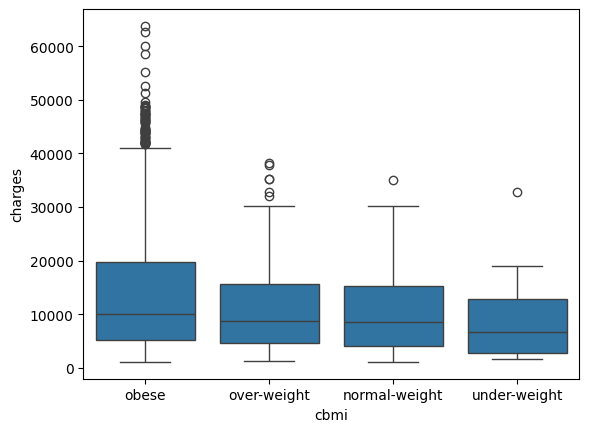

In [21]:
sns.boxplot(x="cbmi", y="charges", data=data)

<Axes: xlabel='smoker', ylabel='charges'>

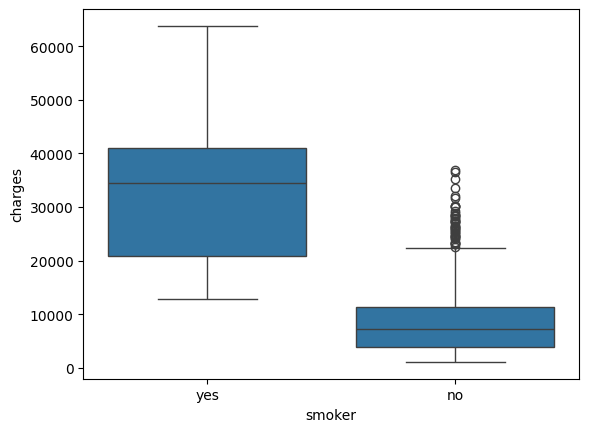

In [22]:
sns.boxplot(x="smoker", y="charges", data=data)

<Axes: xlabel='children', ylabel='charges'>

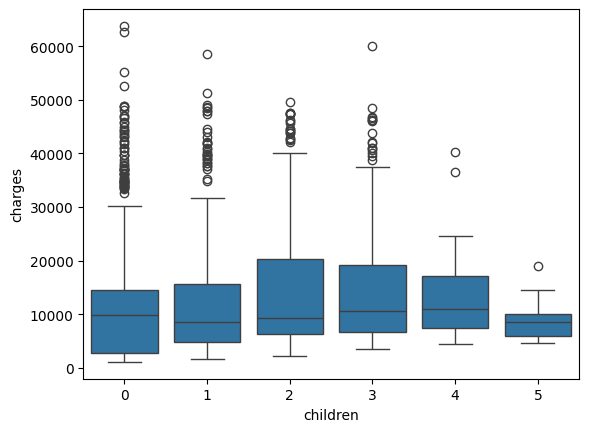

In [23]:
sns.boxplot(x="children", y="charges", data=data)

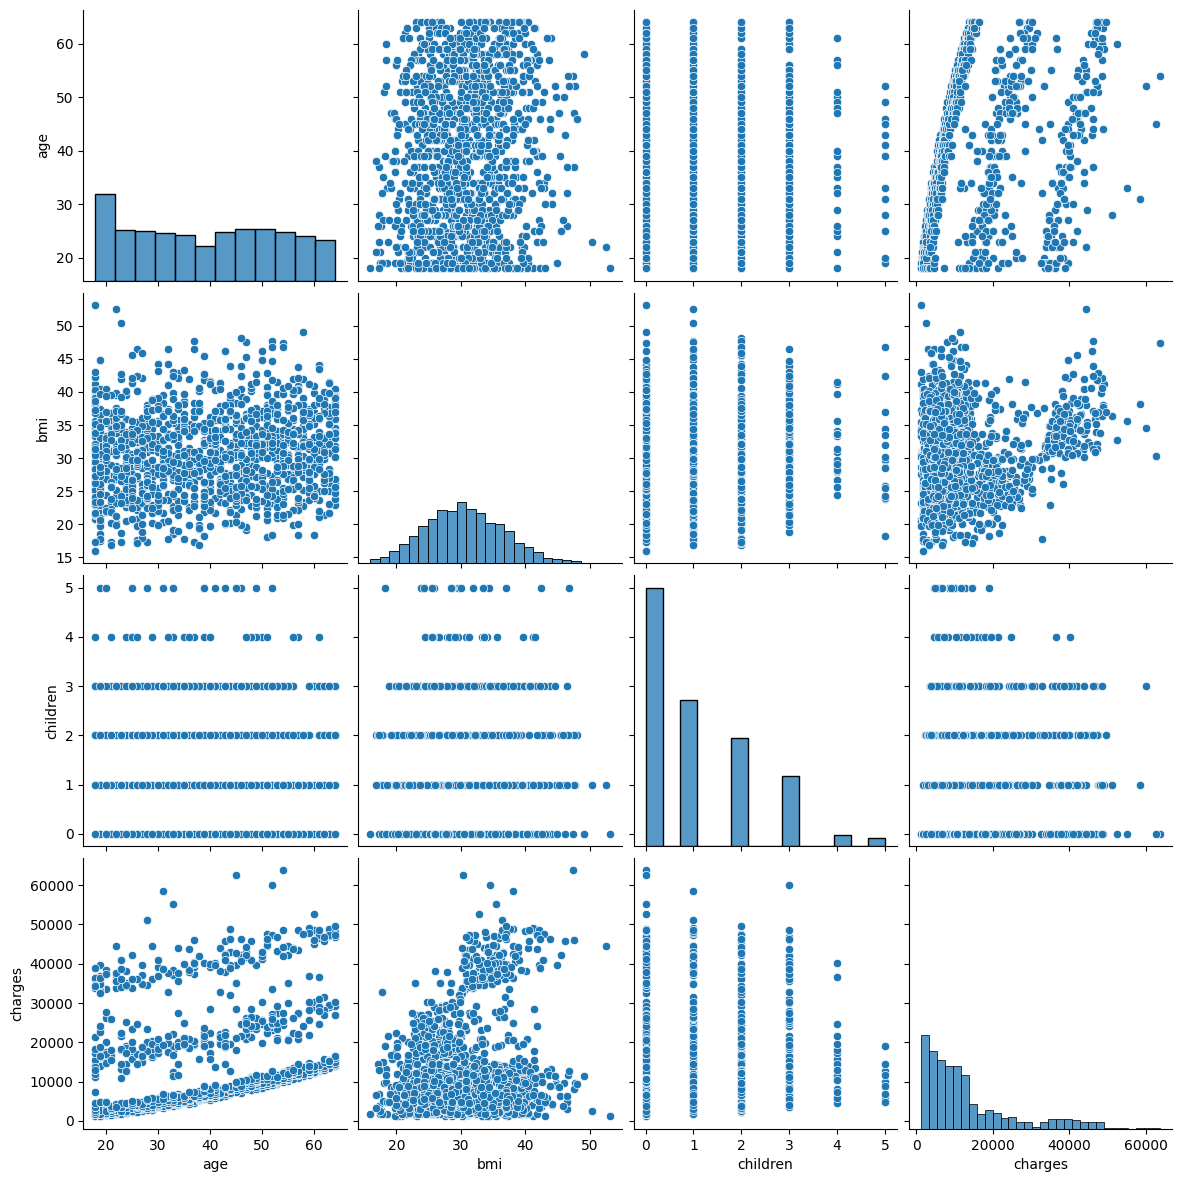

In [25]:
sns.pairplot(data, height=3)

<h4>Descriptive statistics</h4>

In [27]:
target = data["charges"]
features = data.drop(["age", "bmi", "charges"], axis=1)
min_cost = np.min(target)
max_cost = np.max(target)
mean_cost = np.mean(target)
med_cost = np.median(target)
std_cost = np.median(target)
std_cost = np.std(target)
print("Target info ",target.info())
print("Describe target ", target.describe())
print ("Minimum insurance cost: ${:,.2f}".format(min_cost))
print ("Maximum insurance acost: ${:,.2f}".format(max_cost))
print ("Mean insurance cost: ${:,.2f}".format(mean_cost))
print ("Median insurance cost ${:,.2f}".format(med_cost))
print ("Standard deviation of insurance costs: ${:,.2f}".format(std_cost))

<class 'pandas.core.series.Series'>
Index: 1338 entries, 1267 to 568
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB
Target info  None
Describe target  count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
Minimum insurance cost: $1,121.87
Maximum insurance acost: $63,770.43
Mean insurance cost: $13,270.42
Median insurance cost $9,382.03
Standard deviation of insurance costs: $12,105.48


In [29]:
output = pd.DataFrame(index=features.index)

for col, col_data in features.items():
    if object == col_data.dtype:
        col_data = col_data.replace(['yes', 'no'], [1, 0])
        
    if object == col_data.dtype:
        col_data = pd.get_dummies(col_data, prefix = col)
    output = output.join(col_data)

features = output
print ("Processed feature columns ({} total features):\n{}".format(len(features.columns), list(features.columns)))

Processed feature columns (18 total features):
['sex_female', 'sex_male', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'cbmi_normal-weight', 'cbmi_obese', 'cbmi_over-weight', 'cbmi_under-weight', 'cage_10-19', 'cage_20-29', 'cage_30-39', 'cage_40-49', 'cage_50-59', 'cage_60-69']


/tmp/ipykernel_2888/1580591881.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col_data = col_data.replace(['yes', 'no'], [1, 0])


<h4>Developing the model</h4>

In [30]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)


In [35]:
from time import time
from sklearn.metrics import r2_score, explained_variance_score
def train_pred_model(clf, X_train, y_train, X_test, y_test):
    """
    Fit a classifier to the training data
    """
    clf.fit(X_train, y_train)
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    print ("Predictions for training data:")
    start = time()
    y_pred = clf.predict(X_train)
    end = time()
    print ("Made predictions for training data in {:.4f} seconds.".format(end - start))
    print ("R^2 score for training set: {:4f}".format(r2_score(y_train.values, y_pred)))
    print ("explained-variance score for training set: {:4f}".format(explained_variance_score(y_train.values, y_pred)))
    print ('#'*50)
    print ("Predictions for testing data:")
    start = time()
    y_pred = clf.predict(X_test)
    end = time()
    print ("Made predictions for testing data in {:.4f} seconds.".format(end - start))
    print ("R^2 score for testing set: {:4f}".format(r2_score(y_test.values, y_pred)))
    print ("explained-variance score for testing set: {:4f}".format(explained_variance_score(y_test.values, y_pred)))


In [36]:
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

clf_a = DecisionTreeRegressor(random_state=1)
clf_b = SVR()
clf_c = KNeighborsRegressor()
clf_d = NuSVR()
for clf in (clf_a, clf_b, clf_c, clf_d):
    for size in (300, 600, 900):
        train_pred_model(clf, X_train[:size], y_train[:size], X_test, y_test)

Training a DecisionTreeRegressor using a training set size of 300. . .
Predictions for training data:
Made predictions for training data in 0.0026 seconds.
R^2 score for training set: 0.966599
explained-variance score for training set: 0.966599
##################################################
Predictions for testing data:
Made predictions for testing data in 0.0028 seconds.
R^2 score for testing set: 0.729547
explained-variance score for testing set: 0.733552
Training a DecisionTreeRegressor using a training set size of 600. . .
Predictions for training data:
Made predictions for training data in 0.0028 seconds.
R^2 score for training set: 0.965592
explained-variance score for training set: 0.965592
##################################################
Predictions for testing data:
Made predictions for testing data in 0.0027 seconds.
R^2 score for testing set: 0.746475
explained-variance score for testing set: 0.749024
Training a DecisionTreeRegressor using a training set size of 900. .

In [39]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    rs = ShuffleSplit(n_splits=16, test_size=0.20, random_state=1)
    cv_sets = rs.split(X)

    reg = DecisionTreeRegressor(random_state=0)
    params = {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'splitter': ['best', 'random'],
        'max_depth': range(1, 11),
    }

    scoring_fnc = make_scorer(r2_score)
    grid = GridSearchCV(estimator=reg,
                        param_grid=params,
                        scoring=scoring_fnc,
                        cv=cv_sets)

    try:
        grid.fit(X, y)  # Use consistent variable names
    except Exception as e:
        print(f"An error occurred: {e}")

    return grid.best_estimator_

best_reg = fit_model(X_train, y_train)

print('Model Parameters:')
print("Parameter 'criterion' is {} for the optimal model.".format(best_reg.get_params()['criterion']))
print("Parameter 'splitter' is {} for the optimal model.".format(best_reg.get_params()['splitter']))
print("Parameter 'max_depth' is {} for the optimal model.".format(best_reg.get_params()['max_depth']))

# Predictions and evaluation metrics
predictions = best_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

train_pred_model(best_reg, X_train, y_train, X_test, y_test)  

Model Parameters:
Parameter 'criterion' is friedman_mse for the optimal model.
Parameter 'splitter' is best for the optimal model.
Parameter 'max_depth' is 4 for the optimal model.
Mean Squared Error: 21813564.47
R² Score: 0.86
Training a DecisionTreeRegressor using a training set size of 1070. . .
Predictions for training data:
Made predictions for training data in 0.0015 seconds.
R^2 score for training set: 0.849305
explained-variance score for training set: 0.849305
##################################################
Predictions for testing data:
Made predictions for testing data in 0.0015 seconds.
R^2 score for testing set: 0.863197
explained-variance score for testing set: 0.863565


/home/patrick/Documents/datascience/projects/python/medical-insurance-cost-analysis/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/home/patrick/Documents/datascience/projects/python/medical-insurance-cost-analysis/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/patrick/Documents/datascience/projects/python/medical-insurance-cost-analysis/venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in

In [40]:
client_data = [
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 ]

In [41]:
best_reg.predict(client_data)

/home/patrick/Documents/datascience/projects/python/medical-insurance-cost-analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([19672.81279903,  5192.34732679, 39611.86644232, 19672.81279903,
        5192.34732679, 39611.86644232])